<a href="https://colab.research.google.com/github/Rithika2407/codedextrack-3/blob/main/Track_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Mean Squared Error (MSE): 1.9832421052631588

Predictions with Country Names:
                     Country  Actual Rank  Predicted Rank
40                     Qatar           41           40.11
22                    Sweden           23           26.89
55                  Ethiopia           56           56.39
72                San Marino           72           72.49
0   United States of America            1            2.85
26  Islamic Republic of Iran           27           29.85
39                    Israel           39           38.66
67        Dominican Republic           68           67.71
10                    Canada           11           11.86
44                   Belarus           45           46.86
83                    Mexico           84           85.40
35                    Greece           36           36.63
90                    Kuwait           86           86.00
62                   Bermuda           63           62.35
12               New Zealand           13           

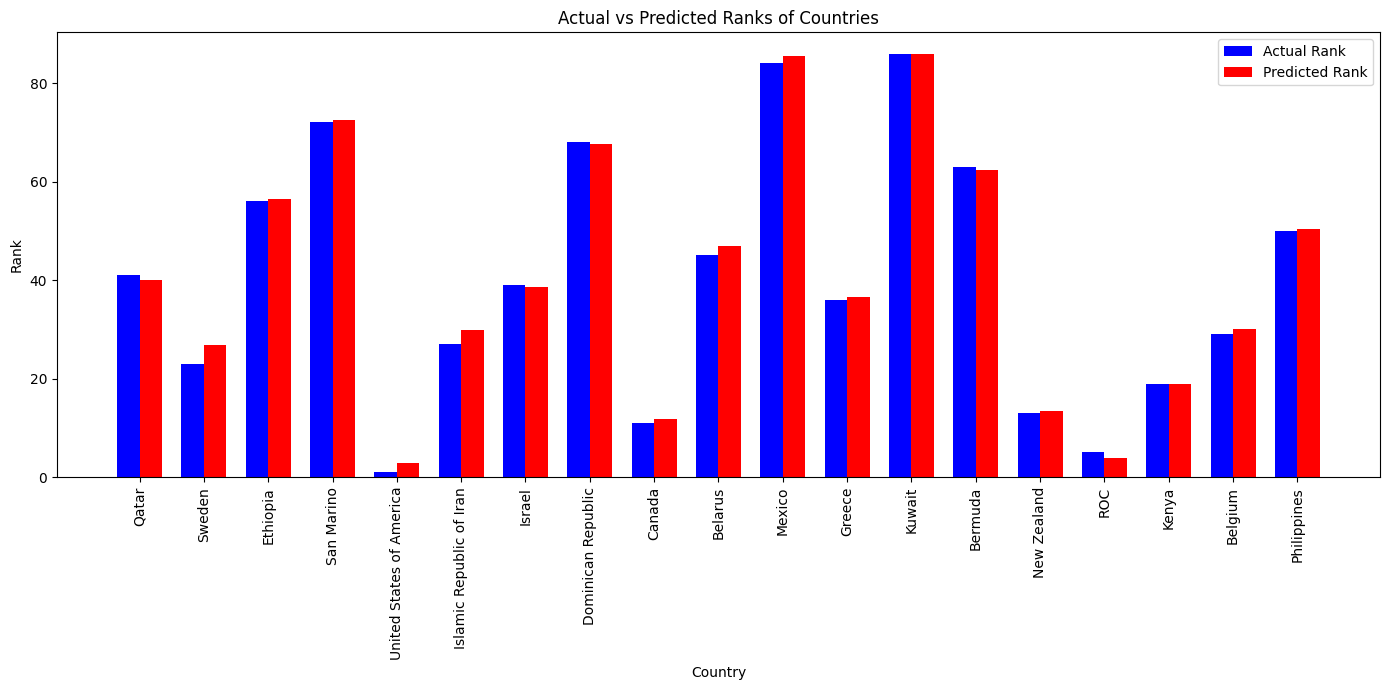

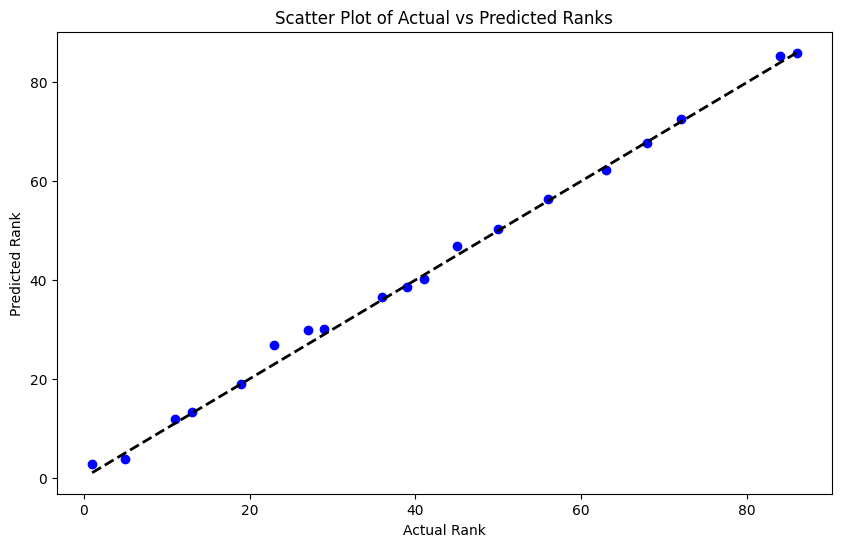

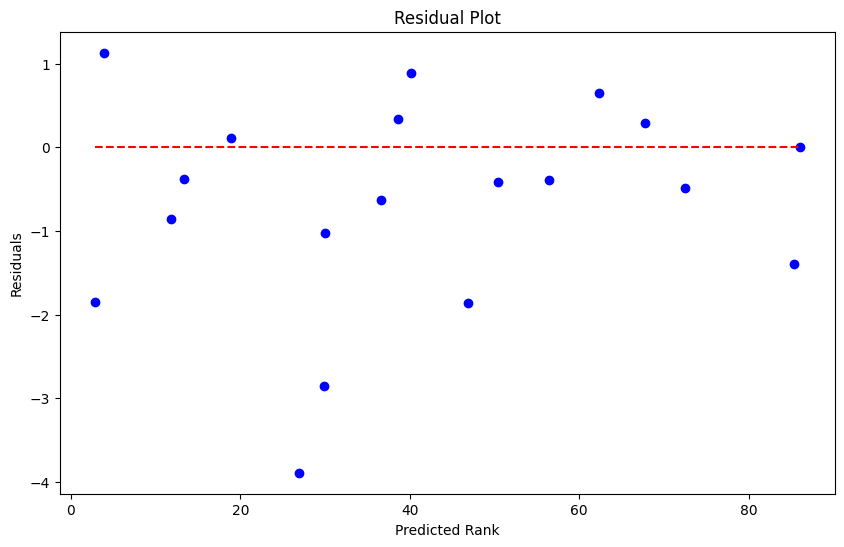

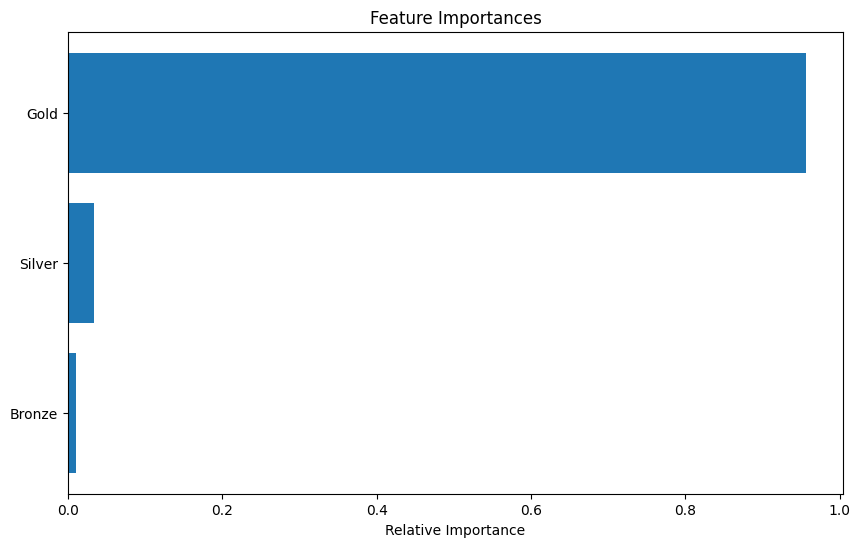

In [ ]:
#we made a rank prediction model using linear regression and random deforest regressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data from the Excel file
file_path = '/content/Medals (1).xlsx'
data = pd.read_excel(file_path)

# Prepare the features and target variable
X = data[['Gold', 'Silver', 'Bronze']]
y = data['Rank']

# Split the data into training and testing sets with test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Prepare the output data with country names, actual ranks, and predicted ranks
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Country'] = data.loc[X_test.index, 'Team/NOC']
test_data_with_predictions['Actual Rank'] = y_test.values
test_data_with_predictions['Predicted Rank'] = y_pred_rf

# Display the results
print("Mean Squared Error (MSE):", mse_rf)
print("\nPredictions with Country Names:")
print(test_data_with_predictions[['Country', 'Actual Rank', 'Predicted Rank']])

# Plotting the results
plt.figure(figsize=(14, 7))
indices = np.arange(len(test_data_with_predictions))
width = 0.35

plt.bar(indices, test_data_with_predictions['Actual Rank'], width=width, label='Actual Rank', color='b')
plt.bar(indices + width, test_data_with_predictions['Predicted Rank'], width=width, label='Predicted Rank', color='r')

plt.xlabel('Country')
plt.ylabel('Rank')
plt.title('Actual vs Predicted Ranks of Countries')
plt.xticks(indices + width / 2, test_data_with_predictions['Country'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Scatter Plot of Actual vs Predicted Ranks
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.title('Scatter Plot of Actual vs Predicted Ranks')
plt.show()

# Residual Plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, color='blue')
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Rank')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Feature Importances
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Down below is the visualization of the tokyo olympics data that we got

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [ ]:
df_gender = pd.read_excel('/content/EntriesGender.xlsx')
df_team = pd.read_excel('/content/Teams.xlsx')
df_athlete = pd.read_excel('/content/Athletes.xlsx')
df_coaches = pd.read_excel('/content/Coaches.xlsx')
df_medals = pd.read_excel('/content/Medals.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


**Medal Data Analysis**

In [ ]:
df_medals.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


<Axes: xlabel='Bronze', ylabel='Count'>

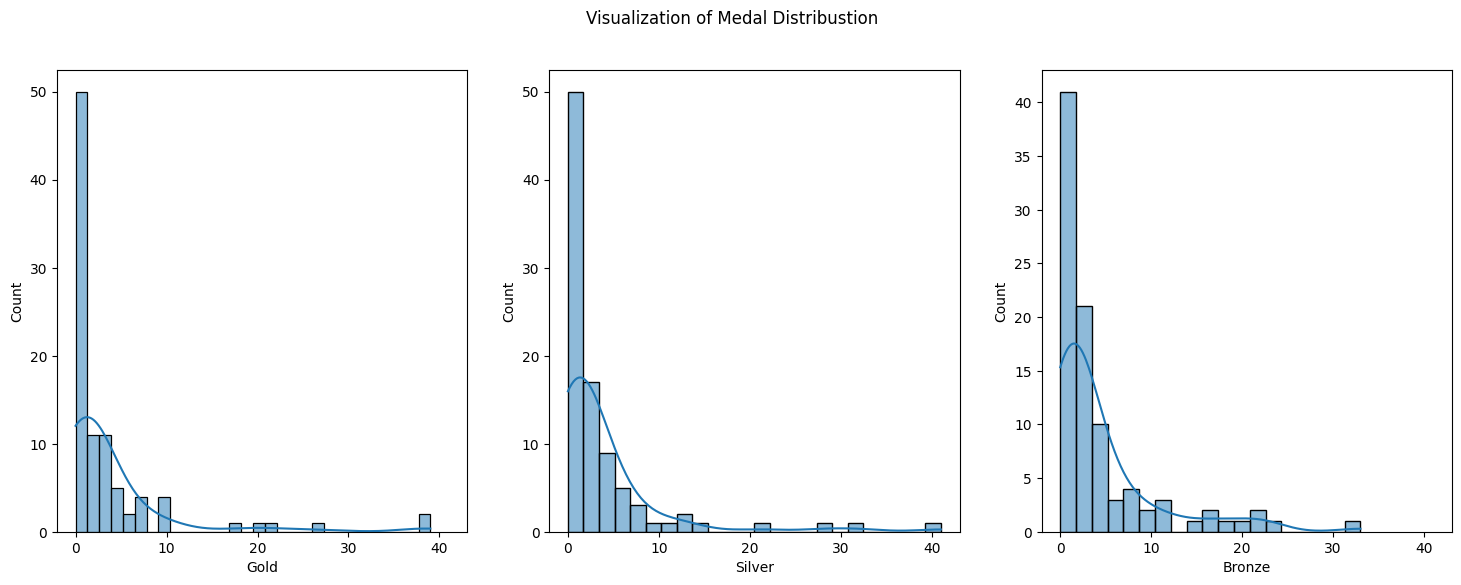

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(18,6))
figure.suptitle('Visualization of Medal Distribustion')
sns.histplot(df_medals['Gold'] , kde=True,ax=axes[0])
sns.histplot(df_medals['Silver'] , kde=True,ax=axes[1])
sns.histplot(df_medals['Bronze'] , kde=True,ax=axes[2])

<ipython-input-26-ec844faa0a67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Team/NOC',
<ipython-input-26-ec844faa0a67>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Team/NOC',
<ipython-input-26-ec844faa0a67>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Team/NOC',


<Axes: xlabel='Bronze', ylabel='Team/NOC'>

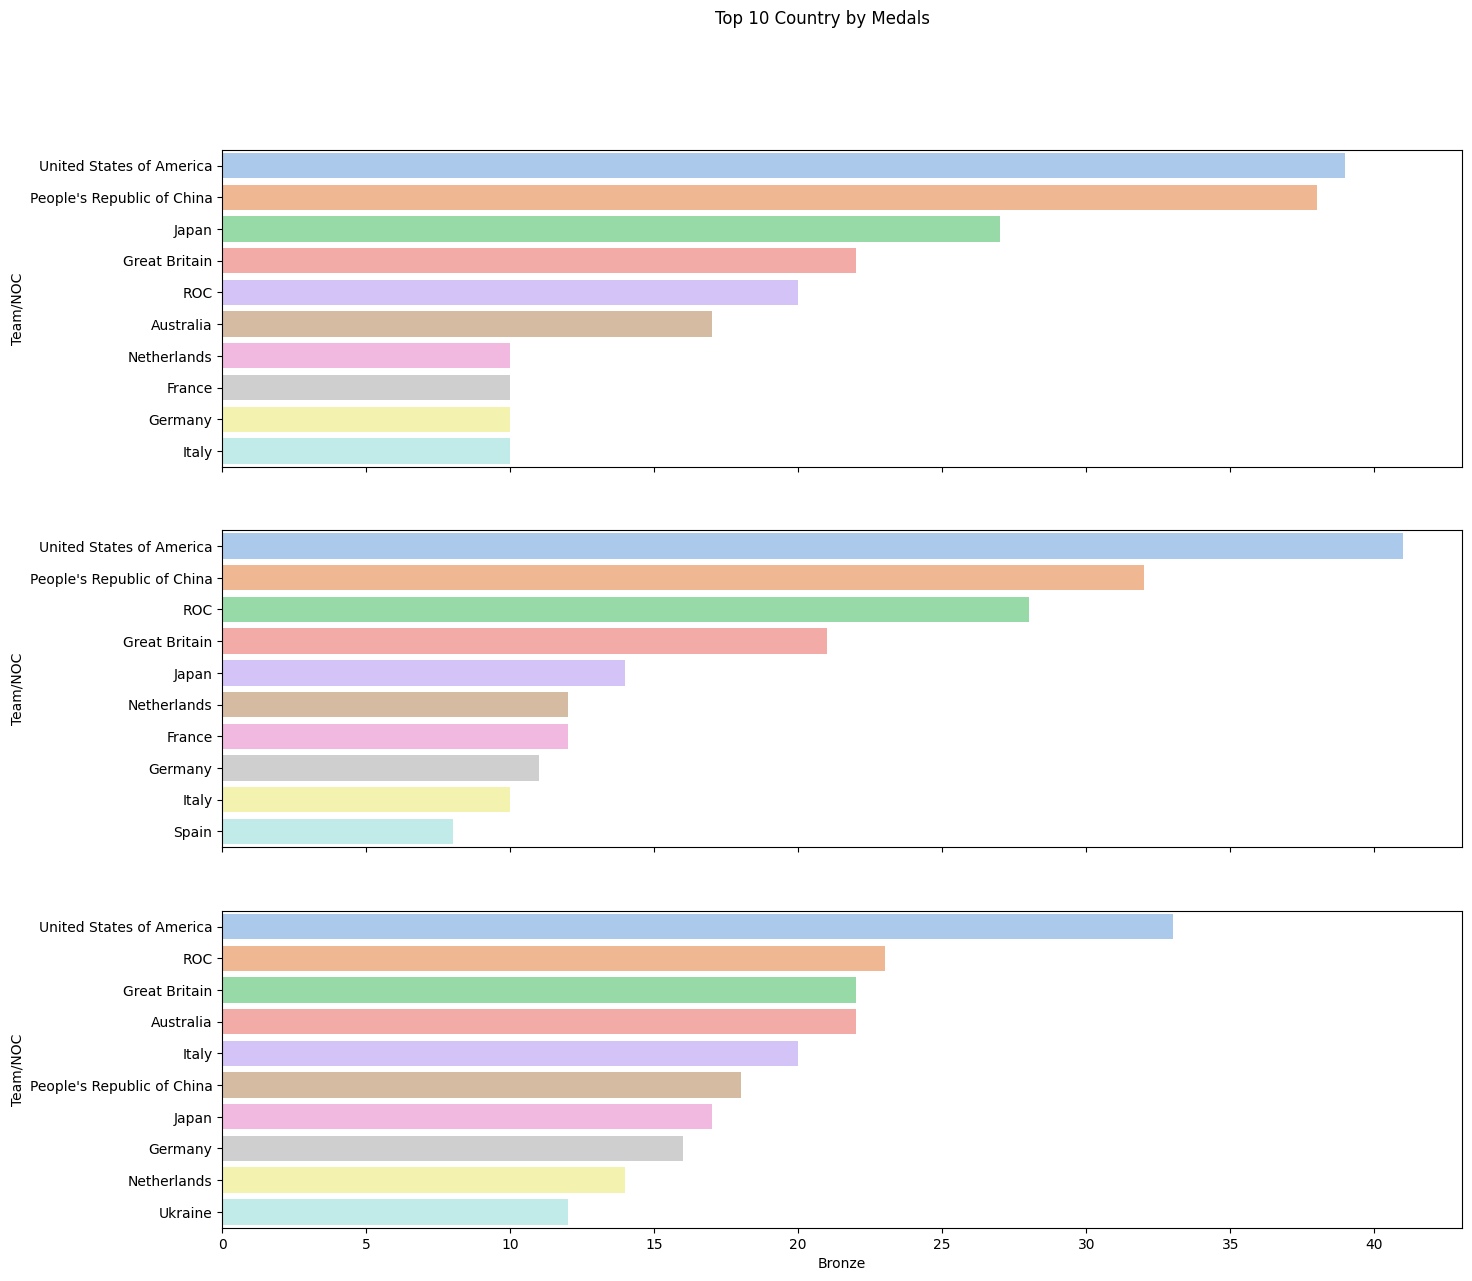

In [ ]:
figure, axes = plt.subplots(3, 1, sharex=True, figsize=(16,14))
figure.suptitle('Top 10 Country by Medals')
sns.barplot(y='Team/NOC',
            x='Gold',
            data=df_medals.sort_values('Gold',ascending = False)[:10],
            palette='pastel',
            ax=axes[0]
           )
sns.barplot(y='Team/NOC',
            x='Silver',
            data=df_medals.sort_values('Silver',ascending = False)[:10],
            palette='pastel',
            ax=axes[1]
           )
sns.barplot(y='Team/NOC',
            x='Bronze',
            data=df_medals.sort_values('Bronze',ascending = False)[:10],
            palette='pastel',
            ax=axes[2]
           )

**Gender Analysis**

In [ ]:
df_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


<Axes: xlabel='Total', ylabel='Count'>

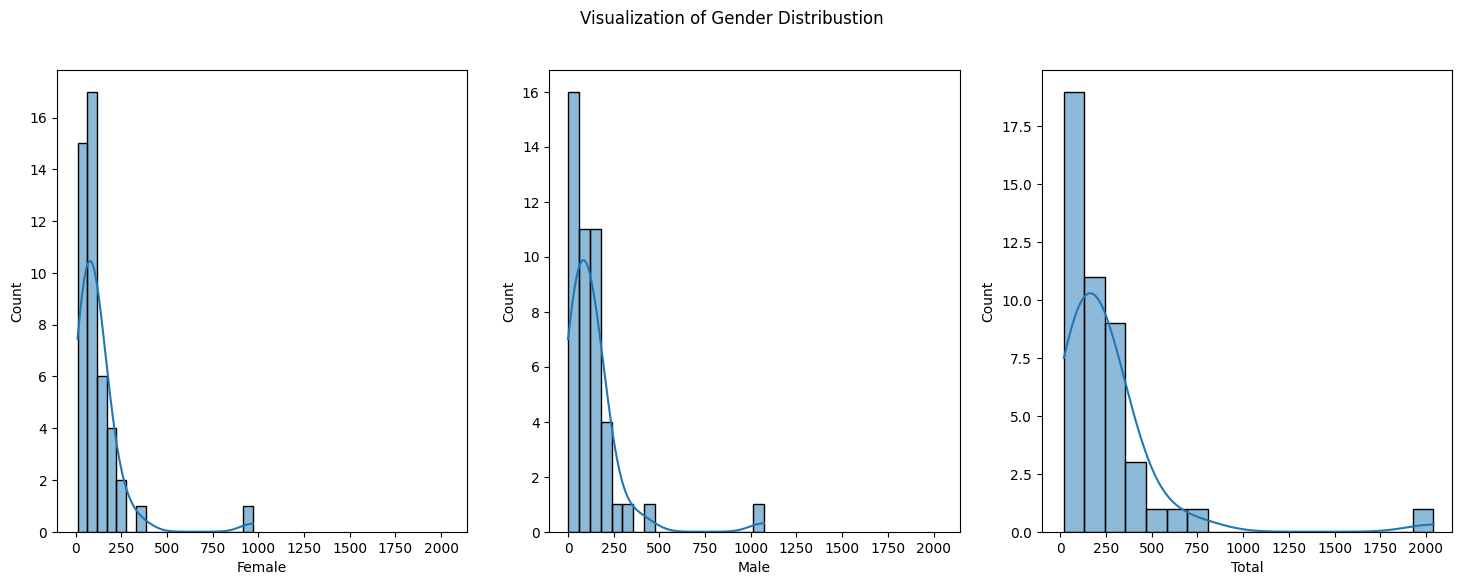

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(18,6))
figure.suptitle('Visualization of Gender Distribustion')
sns.histplot(df_gender['Female'] , kde=True,ax=axes[0])
sns.histplot(df_gender['Male'] , kde=True,ax=axes[1])
sns.histplot(df_gender['Total'] , kde=True,ax=axes[2])

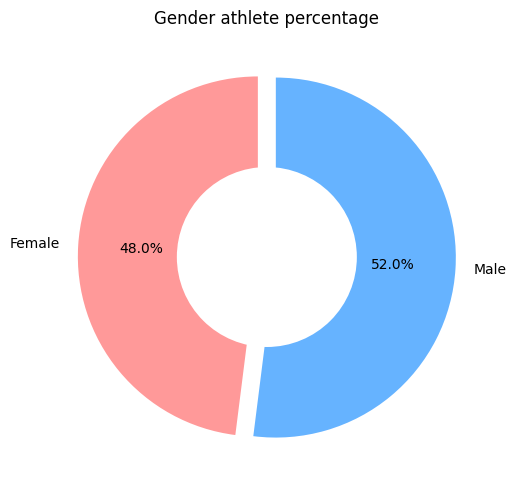

In [ ]:
colors = ['#ff9999','#66b3ff']
labels = ['Female', 'Male']
values = [df_gender['Female'].sum(), df_gender['Male'].sum()]
explode = (0.05,0.05)

plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.65, explode = explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Gender athlete percentage")
plt.show()

<ipython-input-30-542556f43e83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Discipline',
<ipython-input-30-542556f43e83>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Discipline',
<ipython-input-30-542556f43e83>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Discipline',


<Axes: xlabel='Female', ylabel='Discipline'>

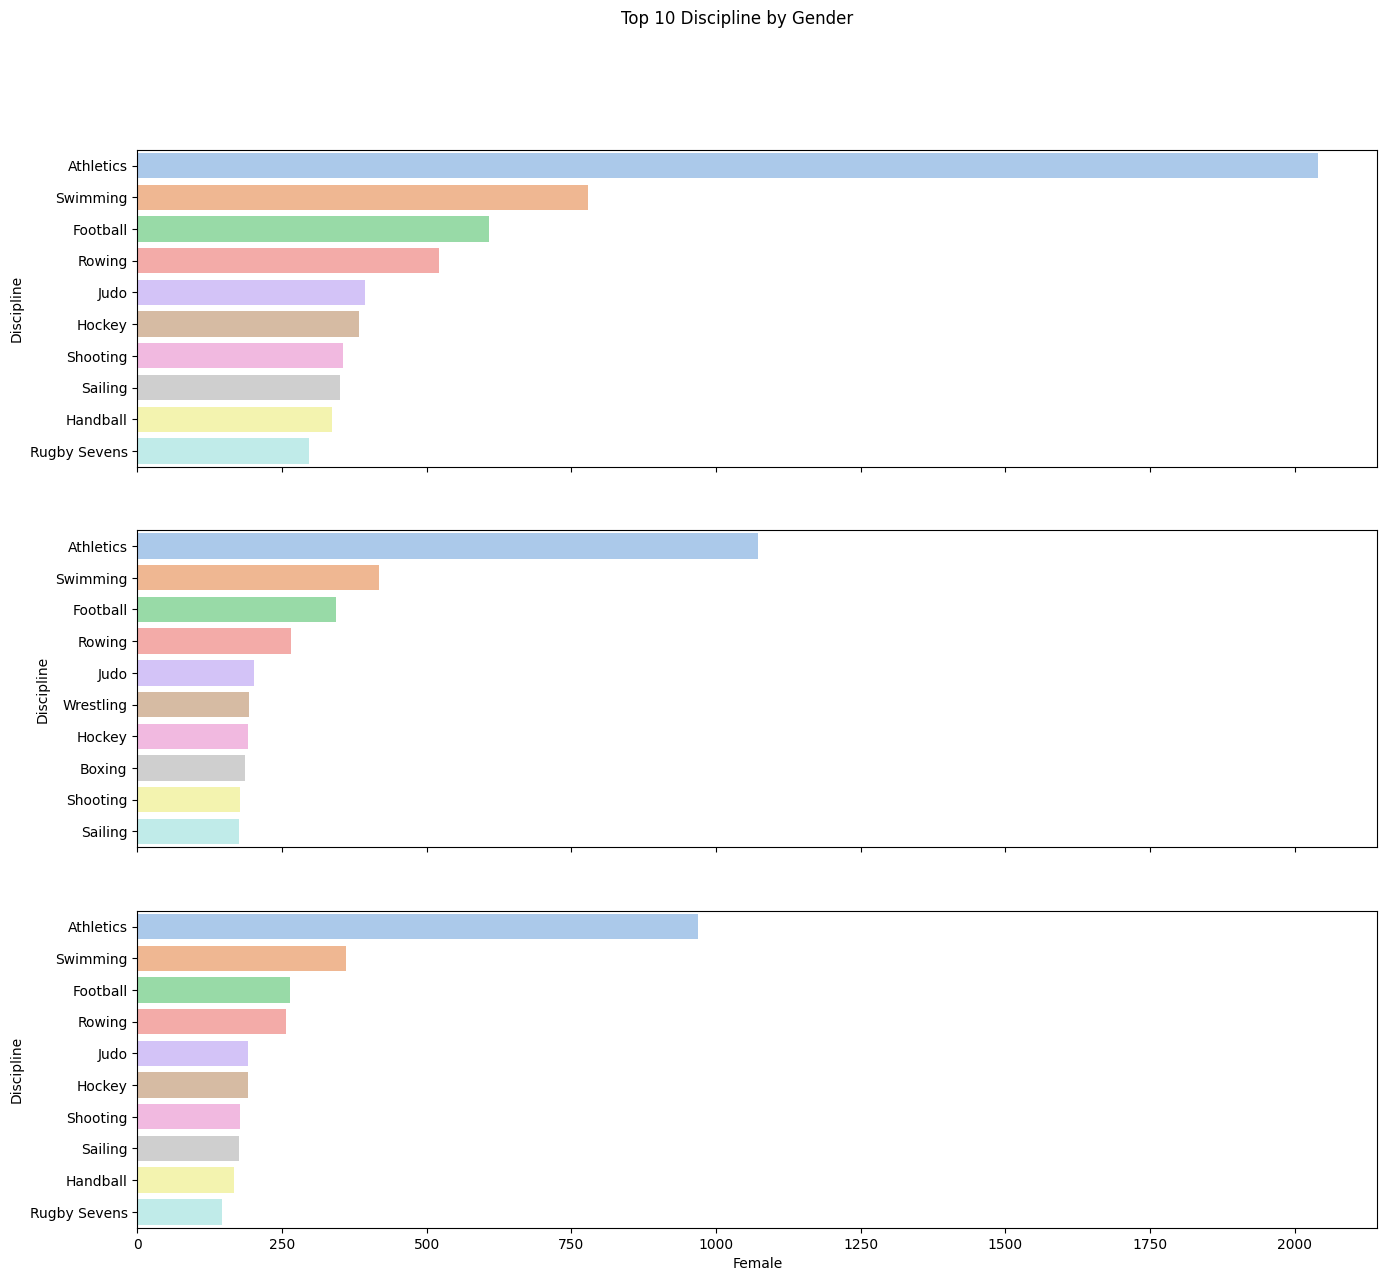

In [ ]:
figure, axes = plt.subplots(3, 1, sharex=True, figsize=(16,14))
figure.suptitle('Top 10 Discipline by Gender')
sns.barplot(y='Discipline',
            x='Total',
            data=df_gender.sort_values('Total',ascending = False)[:10],
            palette='pastel',
            ax=axes[0]
           )
sns.barplot(y='Discipline',
            x='Male',
            data=df_gender.sort_values('Male',ascending = False)[:10],
            palette='pastel',
            ax=axes[1]
           )
sns.barplot(y='Discipline',
            x='Female',
            data=df_gender.sort_values('Female',ascending = False)[:10],
            palette='pastel',
            ax=axes[2]
           )

**Teams Data Analysis**

In [ ]:
df_team.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


<ipython-input-34-6a685cd404f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Name',data=df_team,palette='pastel', order=df_team['Name'].value_counts().iloc[:10].index)


<Axes: title={'center': 'Top 10 country with most teams'}, xlabel='Name', ylabel='count'>

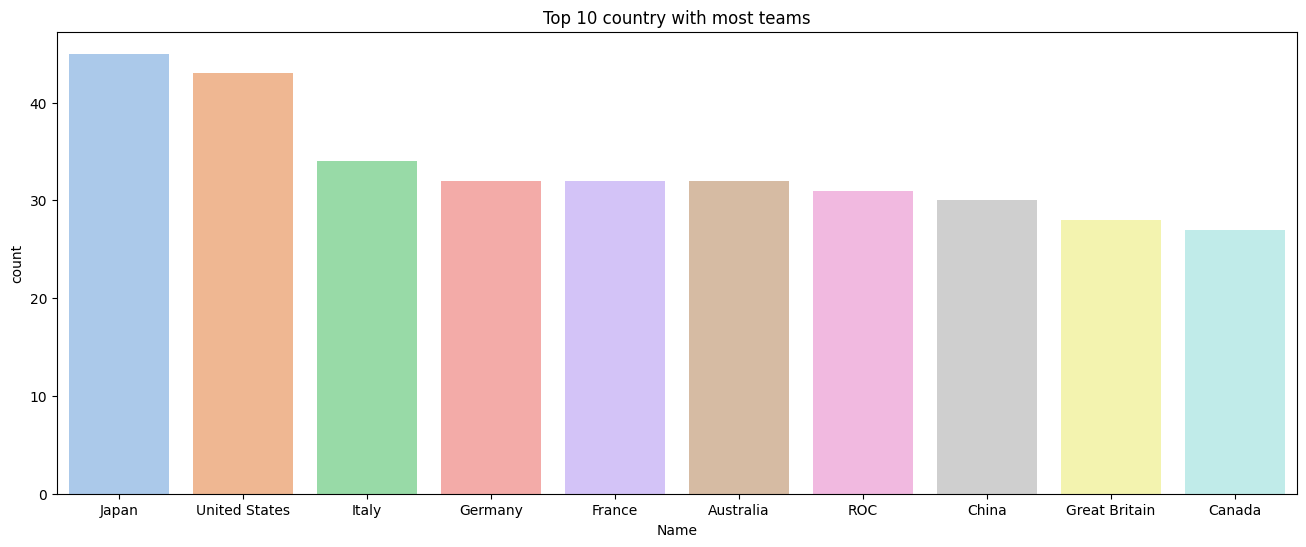

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Top 10 country with most teams')
sns.countplot(x='Name',data=df_team,palette='pastel', order=df_team['Name'].value_counts().iloc[:10].index)

<ipython-input-35-603bb2c49823>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Discipline',data=df_team,palette='pastel', order=df_team['Discipline'].value_counts().iloc[:10].index)


<Axes: title={'center': 'Top 10 discipline with most teams'}, xlabel='Discipline', ylabel='count'>

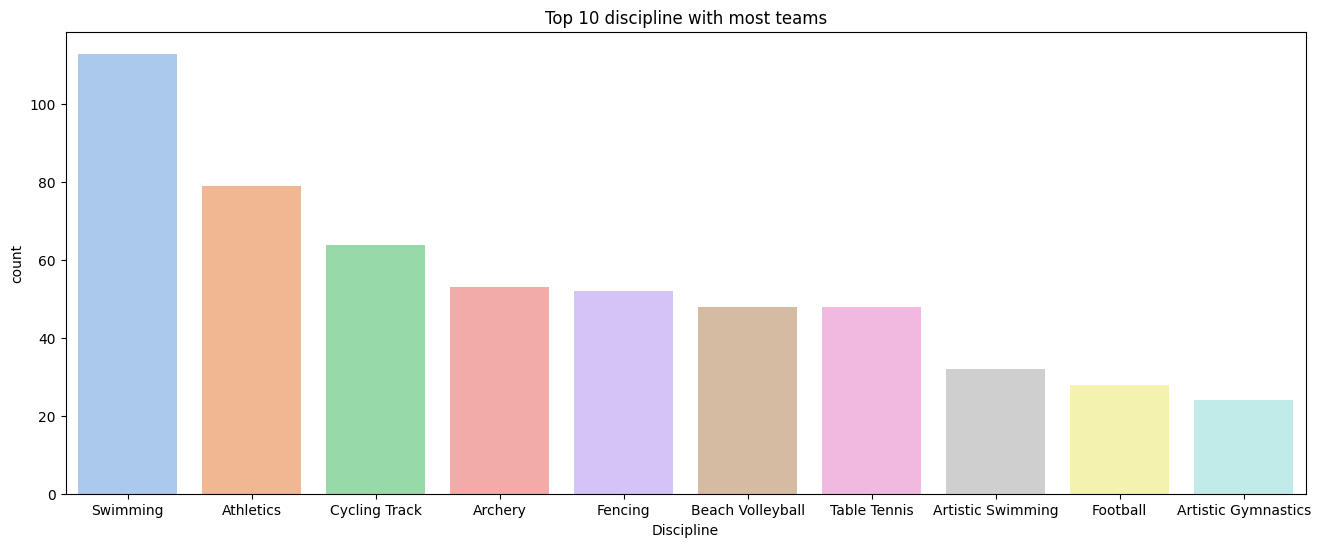

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most teams')
sns.countplot(x='Discipline',data=df_team,palette='pastel', order=df_team['Discipline'].value_counts().iloc[:10].index)

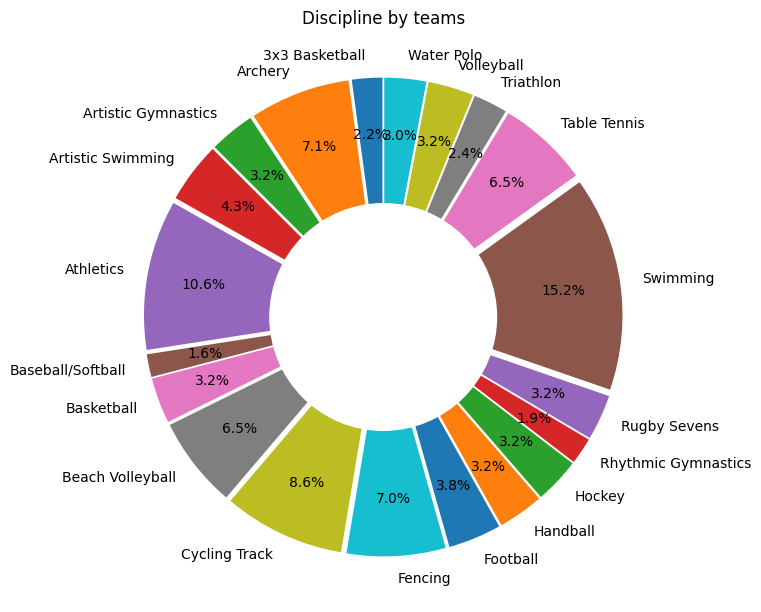

In [ ]:
teams_data = df_team.groupby(['Discipline']).count()
teams_data.reset_index(inplace=True)
labels = teams_data['Discipline']
values = teams_data['Name']
explodes = []

for i in range(20):
    explodes.append(0.05)

plt.figure(figsize=(20,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode = explodes)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Discipline by teams")
plt.show()

**Atheltes Data Analysis**

In [ ]:
df_athlete.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


<ipython-input-38-0d9592369eda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NOC',data=df_athlete,palette='pastel', order=df_athlete['NOC'].value_counts().iloc[:10].index)


<Axes: title={'center': 'Top 10 discipline with most Atheltes'}, xlabel='count', ylabel='NOC'>

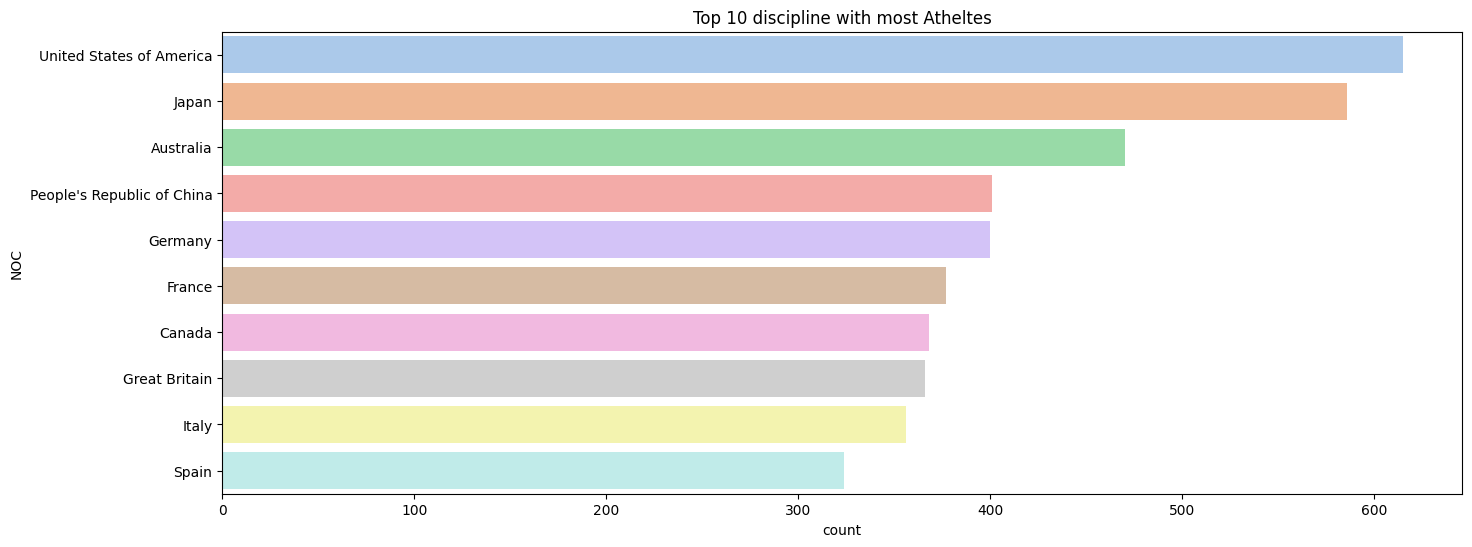

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most Atheltes')
sns.countplot(y='NOC',data=df_athlete,palette='pastel', order=df_athlete['NOC'].value_counts().iloc[:10].index)

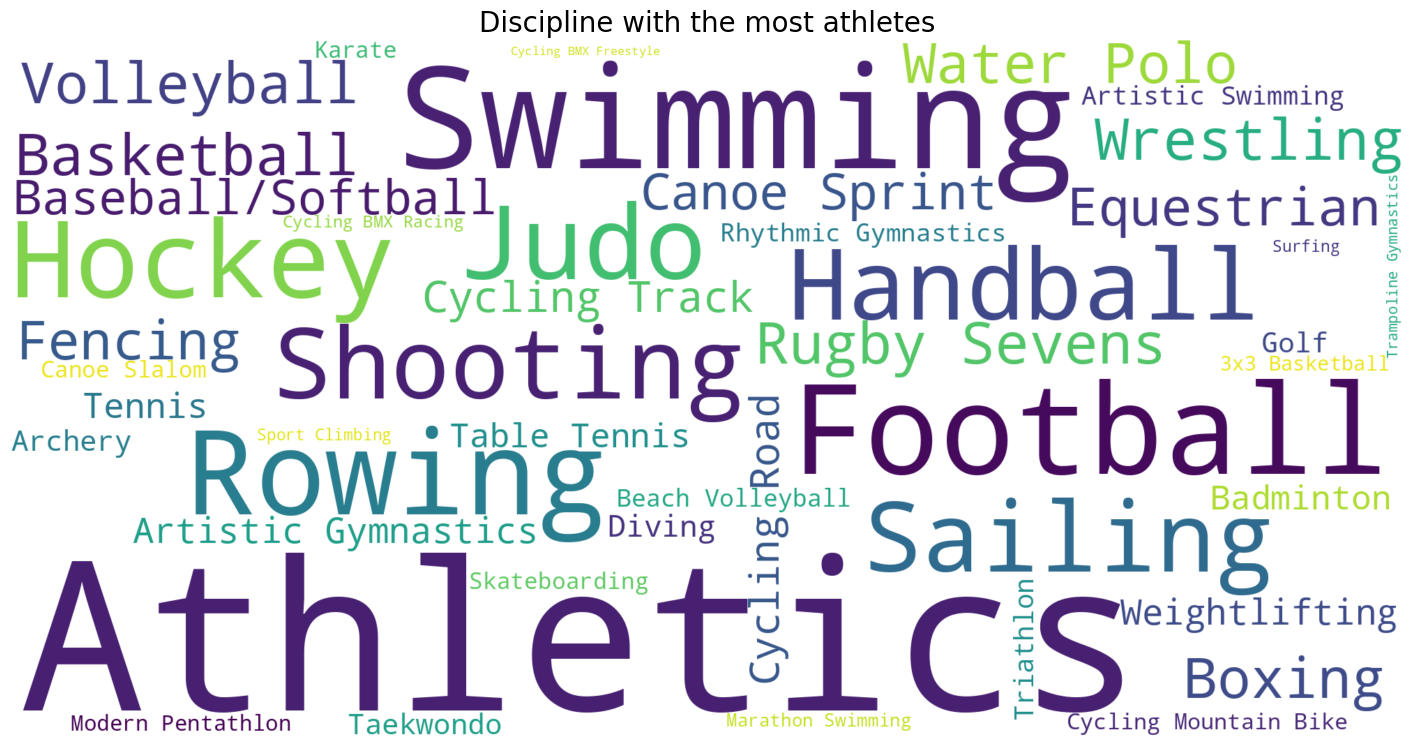

In [ ]:
discipline_athelte = df_athlete['Discipline'].value_counts()
wordcloud = WordCloud(
                    width=2000,
                    height=1000,
                    scale=1,
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='white')

wordcloud.generate_from_frequencies(frequencies = discipline_athelte)
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Discipline with the most athletes', fontsize = 20)
plt.show()

<ipython-input-42-c149ba98a233>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Discipline',data=df_athlete,palette='pastel', order=df_athlete['Discipline'].value_counts().iloc[:10].index)


<Axes: title={'center': 'Top 10 discipline with most Atheletes'}, xlabel='count', ylabel='Discipline'>

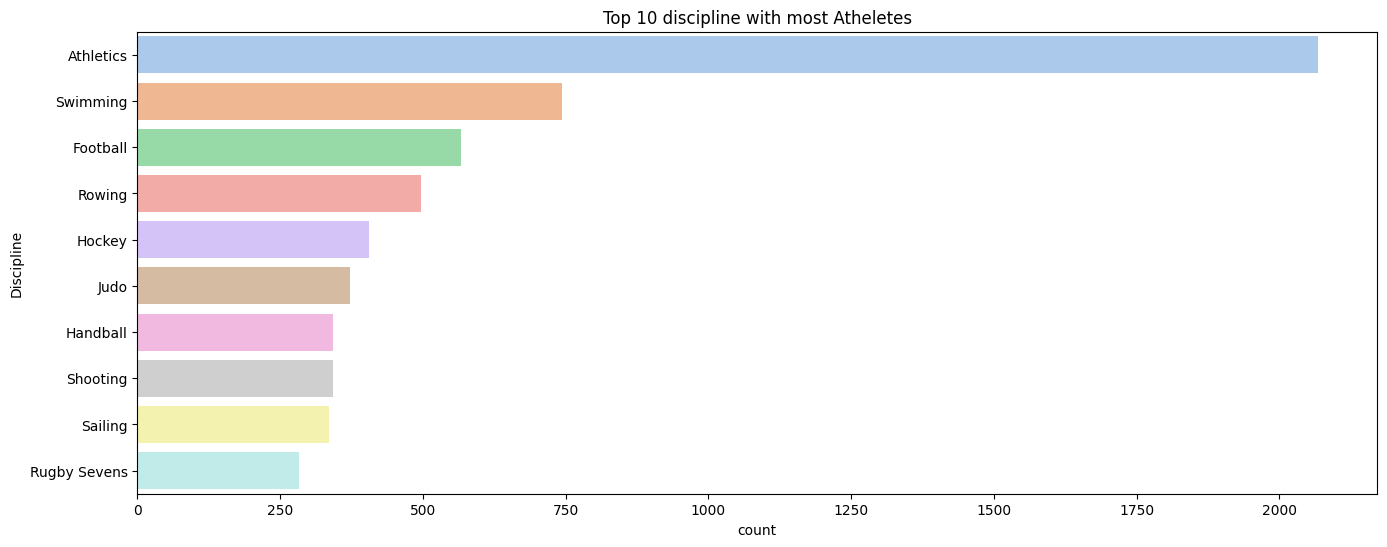

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most Atheletes')
sns.countplot(y='Discipline',data=df_athlete,palette='pastel', order=df_athlete['Discipline'].value_counts().iloc[:10].index)

**Coaches Data Analysis**

In [ ]:
df_coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


<ipython-input-45-b2fe4ba4c55a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Discipline',data=df_coaches,palette='pastel', order=df_coaches['Discipline'].value_counts().iloc[:10].index)


<Axes: title={'center': 'Top 10 discipline with most Coaches'}, xlabel='count', ylabel='Discipline'>

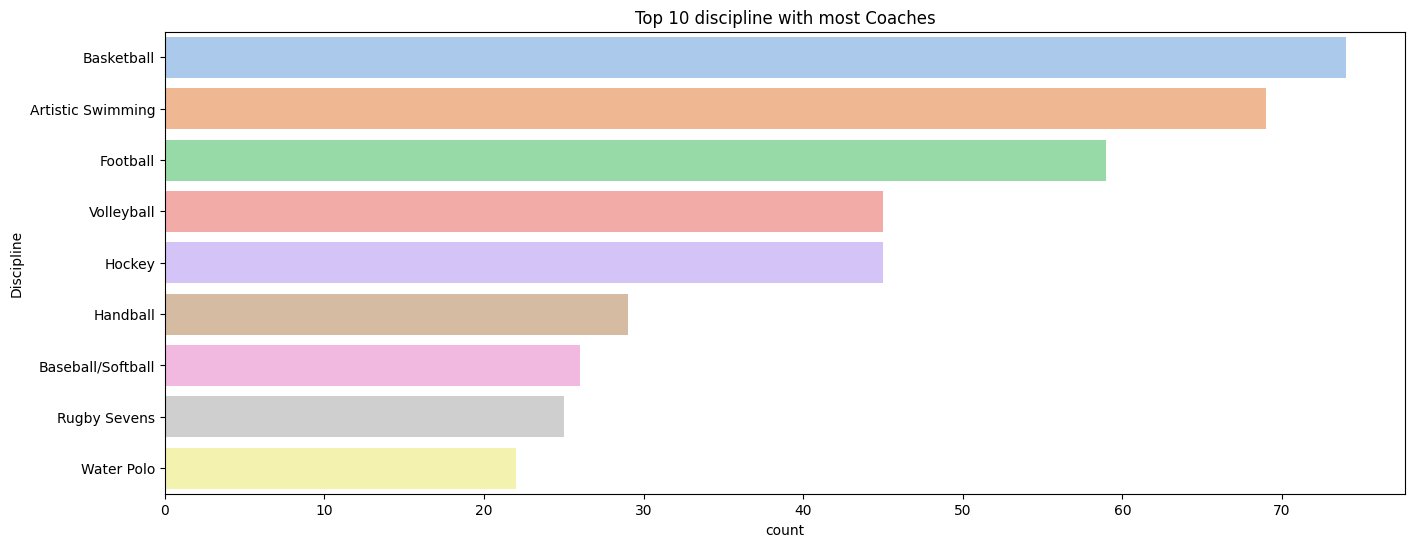

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most Coaches')
sns.countplot(y='Discipline',data=df_coaches,palette='pastel', order=df_coaches['Discipline'].value_counts().iloc[:10].index)